In [20]:
#importing dependencies for data wrangling
import pandas as pd
import numpy as np

In [76]:
# importing modules for data visualization
import matplotlib.pyplot as plt
from mglearn.plot_helpers import  cm2
from mglearn.plots import plot_2d_separator , plot_2d_classification
from mglearn import  discrete_scatter

In [47]:
# importing machine learning modules
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, learning_curve, KFold

In [58]:
# Importing datasets
from sklearn.datasets import load_breast_cancer, make_blobs
from mglearn.datasets import load_extended_boston, make_forge


### Analysing a dataset using Logistic Regression

##### We will use a model to classify between two classes, which is also known as binary classification

In [24]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [25]:
# Initializing the model to 3 neighbors
logreg = LogisticRegression(max_iter=10000)

In [26]:
#Fitting the model with data
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [27]:
# Making predictions
print("Test set predictions: {}". format(logreg.predict(X_test)))

Test set predictions: [1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1]


In [32]:
# Calculating accuracy
print("Test set accuracy: {:.2f}".format(logreg.score(X_test, y_test)))
print("Training set accuracy: {:.2f}".format(logreg.score(X_train, y_train)))

Test set accuracy: 0.94
Training set accuracy: 0.98


-  ##### The training set score of the is almost equivalent to the test set score
-  ##### That means the model is underfitted 
-  ##### This is the not type of behaviour we want for our model because it will be too simple 

In [31]:
logreg100 = LogisticRegression(C=100, max_iter=1000000).fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(logreg100.score(X_test, y_test)))
print("Training set accuracy: {:.2f}".format(logreg100.score(X_train, y_train)))

Test set R^2: 0.97
Training set R^2: 0.99


-  ##### Using c=100 results in higher accuracy for both the test set and the training set 
-  ##### This model is complex enough to perform better
-  ##### This is type of behaviour we want for our model 

In [33]:
logreg001 = LogisticRegression(C=0.01, max_iter=1000000).fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(logreg001.score(X_test, y_test)))
print("Training set accuracy: {:.2f}".format(logreg001.score(X_train, y_train)))

Test set accuracy: 0.94
Training set accuracy: 0.96


-  ##### Using c=0.01 results in a decreased accuracy for both the test set and the training set 
-  ##### This model is underfitted 

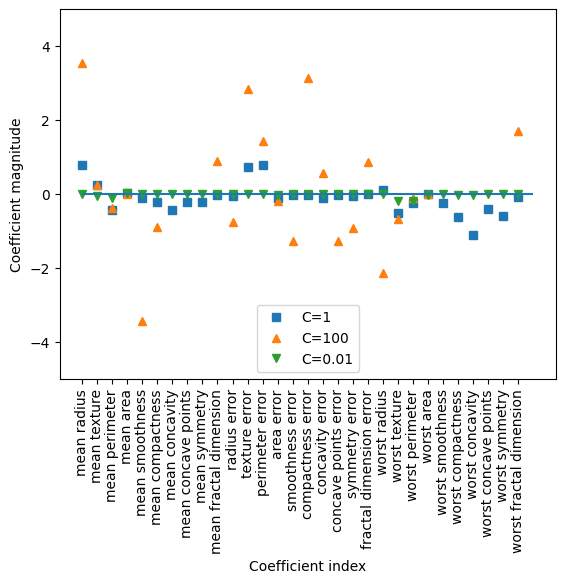

In [40]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend()

-  ##### Logistic Regression applies L2 regularization by default and the results look similar to ridge regression
-  ##### Having a C that is lower(1 or 0.01) penalizes the coefficients and often results in simpler model that is prone to underfitting 
-  ##### Having a C=100 allows the model to use more features hence increasing the accuracy

##### Using L1 regularization 

Training accuracy of l1 logreg with C=0.001: 0.92
Test accuracy of l1 logreg with C=0.001: 0.90
Training accuracy of l1 logreg with C=1.000: 0.97
Test accuracy of l1 logreg with C=1.000: 0.94
Training accuracy of l1 logreg with C=100.000: 1.00
Test accuracy of l1 logreg with C=100.000: 0.97


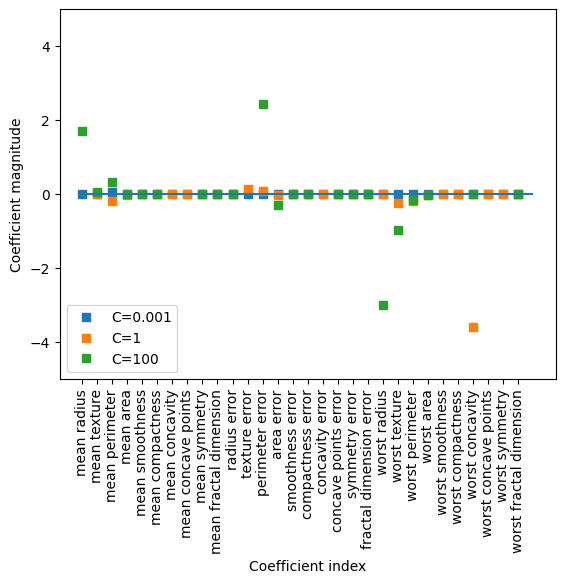

In [46]:
for C, marker in zip([0.001,1,100], ['o','^','v']):
    
    lr_l1 =  LogisticRegression(C=C, penalty="l1", solver='liblinear', max_iter=1000000).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, 's', label="C={}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)


-  ##### There are many parallels between linear model for binary classification and regression

### Analysing a dataset using Linear Support Vector Machines

##### Visualizing the difference SVM and Logistic Regression

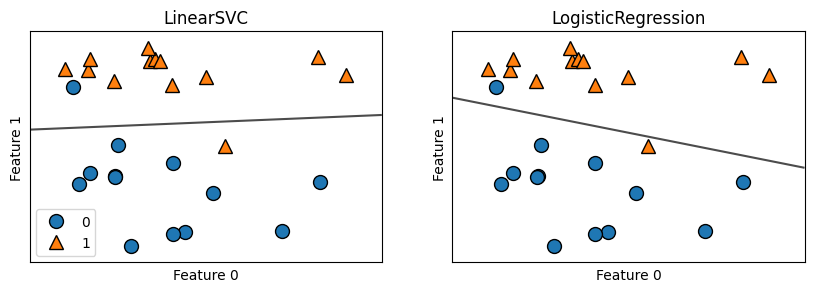

In [57]:
X, y = make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=100000, dual='auto'), LogisticRegression(max_iter=100000)], axes):
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
    

-  ##### The two models come up with a similar decision boundary
-  ##### Both models misclassify two of the points
-  ##### Both models use L2 regularization

##### Visualizing the SVM at varying L2 regularization

In [61]:
def plot_linear_svc_regularization():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    fig, axes = plt.subplots(1,3,figsize=(12,4))
    
    y[7] = 0
    y[27] = 0

    x_min, x_max = X[:, 0].min()-.5, X[:, 0].max()+.5
    y_min, y_max = X[:, 1].min()-.5, X[:, 1].max()+.5
    

    for ax, C in zip(axes, [1e-2, 10, 1e3]):
        discrete_scatter(X[:,0], X[:,1], y, ax=ax)

        svm = LinearSVC(C=C, tol=0.00001, dual=False).fit(X,y)
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(6, 13)
        yy = a*xx - (svm.intercept_[0]) / w[1]
        ax.plot(xx, yy, c='k')
        ax.set_xlim(x_min, x_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("C = %f" % C)
    axes[0].legend(loc="best")

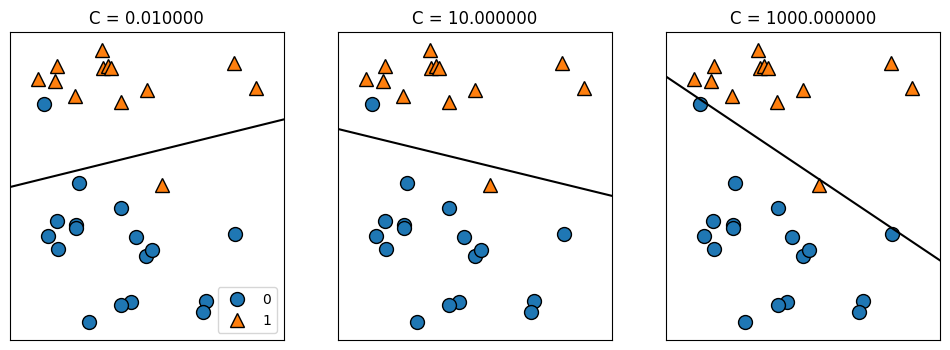

In [62]:
plot_linear_svc_regularization()

-  ##### On the left side, we have a very small C corresponding to alot of regularization  
-  ##### In the center plot, C is slightly higher, the model focuses on the misclassified point by tilting the boundary
-  ##### on the right hand side the very high value of C in the model tilts the decision boundary a lot and correctly classifying all points in class 0

##### Using Support Vector Machines for multiclass classification

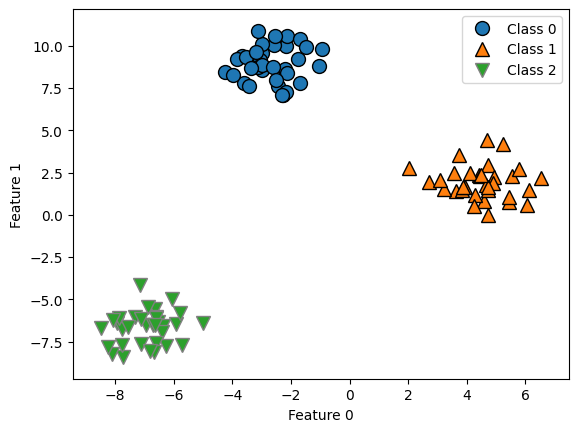

In [73]:
X, y = make_blobs(random_state=42)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

-  ##### We observe a two dimensional toy dataset containg three classes

In [74]:
linear_svm = LinearSVC(dual=False).fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


-  ##### The coefficient shape contains the coefficient value for a specific features
-  ##### The intercept stores all intercepts of each class

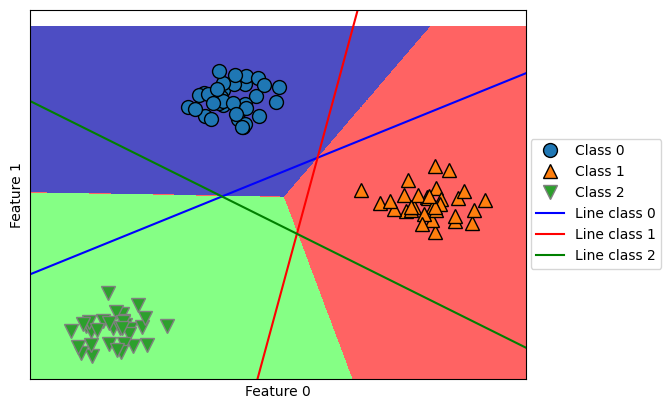

In [79]:
plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b','r','g']):
    plt.plot(line, -(line * coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0","Line class 1","Line class 2"], loc=(1.01, 0.3))

-  ##### For points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the "Class 0" side of the boundary
-  ##### The points in class 0 are above the the line coresponding to class 2 which means they are classified as "rest"
-  ##### The points in class 0 are to the left the the line coresponding to class 1 which means they are classified as "rest"
-  ##### Therefore any point in the this area will be classified as class 0